In [49]:
import pandas as pd
import importlib
import mpt_functions as mpt
importlib.reload(mpt)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from datetime import datetime, timedelta
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [28]:
f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

# **************************************************************************************************************#

path = "/Users/abdullahfurkanarslan/Desktop/metropt+3+dataset 2/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)

#

df = mpt.drop_a_column(df, "Unnamed: 0")

#

df = df.assign(condition=0)
df = mpt.change_the_values_by_applying_a_time_filter(df, f1_start, f1_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f2_start, f2_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f3_start, f3_finish, "condition", 1)
df = mpt.change_the_values_by_applying_a_time_filter(df, f4_start, f4_finish, "condition", 1)

# optional 1

df["data_point_number"] = df.index + 1

# optional 2

df  = mpt.counter_for_maintenance(df , "2020-02-01 00:00:00", f1_finish)
df  = mpt.counter_for_maintenance(df , f1_finish, f2_finish)
df  = mpt.counter_for_maintenance(df , f2_finish, f3_finish)
df  = mpt.counter_for_maintenance(df , f3_finish, f4_finish)
df = mpt.counter_for_maintenance(df, f4_finish, "2020-09-01 03:59:51")

#

all_column_names = df.columns.to_list()

name_of_the_categorical_columns = ['COMP', 'DV_eletric', 'Towers',
       'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

name_of_the_numerical_columns =["counter",'data_point_number','TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current']

target_column = df["condition"]

#

df_scaled = mpt.scale_columns(df, name_of_the_numerical_columns)

# optional 3

df_clustered = mpt.apply_kmeans_clustering(df_scaled, 5, "condition")

KeyboardInterrupt: 

In [70]:
def aggregate(df,aggregation_size, n1, n2, m3, n4, n5, n6, n7, n8):
    
    probabilities = mpt.get_the_probabilities_with_logistic_regression(df, n1, n2, m3, n4, n5, n6, n7, n8, "yes")[0]
    y_test = mpt.get_the_probabilities_with_logistic_regression(df, n1, n2, m3, n4, n5, n6, n7, n8, "no")[1]
    df_ed = pd.DataFrame({"proba": probabilities, "condition": y_test})
    result = mpt.group_rows_by_condition(df_ed, aggregation_size)
    return result

def plot_probabilities_by_condition(df, threshold): # tekrar yazılacak

    indices = np.arange(df.shape[0])
    
    # Create figure
    plt.figure(figsize=(8, 5))
    
    # Plot points with condition=0 and proba <= threshold in blue
    mask_0_below = (df['condition'] == 0) & (df['proba'] <= threshold)
    plt.scatter(indices[mask_0_below], df.loc[mask_0_below, 'proba'], 
                color='blue', alpha=0.7, label='condition=0')
    
    # Plot points with condition=0 and proba > threshold in red
    mask_0_above = (df['condition'] == 0) & (df['proba'] > threshold)
    plt.scatter(indices[mask_0_above], df.loc[mask_0_above, 'proba'], 
                color='red', alpha=0.7, label=f'condition=0, proba>{threshold}')
    
    # Plot points with condition=1 in black
    mask_1 = df['condition'] == 1
    plt.scatter(indices[mask_1], df.loc[mask_1, 'proba'], 
                color='black', alpha=0.7, label='condition=1')

    
    # Add labels and title
    plt.title('Probablity of Failure')
    plt.xlabel('Index')
    plt.ylabel('Probability')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

In [51]:
df_back_up = df_clustered.copy()

In [52]:
df = df_back_up.copy()

df1 = df.copy() # best but suspicious

df2 = df.drop(labels = ["Cluster", "counter", "data_point_number"], axis = 1)  # OK but not suspicious

df3 = df.drop(labels = ["counter"], axis = 1) # the worst, do not even look at it

df4 = df.drop(labels = ["Cluster"], axis = 1)

                   Coefficient
data_point_number    11.962103
LPS                  -6.229368
Cluster               5.939853
Oil_temperature       5.054228
counter               4.469146
DV_eletric           -2.897056
Caudal_impulses      -2.305429
Oil_level            -2.305429
TP3                  -1.663416
Reservoirs           -1.429096
Motor_current        -1.345098
TP2                   1.189074
Pressure_switch       0.811906
H1                    0.676301
DV_pressure          -0.653705
MPG                   0.340622
COMP                  0.089759
Towers                0.088994
Intercept: -22.38538767466801


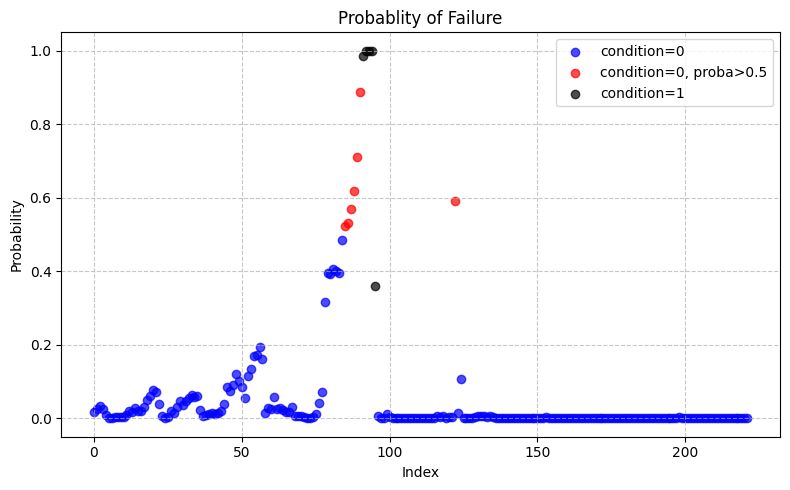

In [66]:
aggregation_size = 400

treshold_probability = 0.5

dataframe = df1

aggregated_probabilities = aggregate(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

                 Coefficient
LPS                -5.655241
Oil_temperature     3.240399
H1                 -2.195878
counter             2.143900
TP2                -1.389866
TP3                -1.018204
Pressure_switch     0.983625
DV_pressure         0.900820
Reservoirs         -0.878094
DV_eletric         -0.591540
Motor_current      -0.449135
Oil_level          -0.448313
Caudal_impulses    -0.448313
COMP               -0.427531
MPG                -0.142219
Towers             -0.019000
Intercept: -9.390251756684192


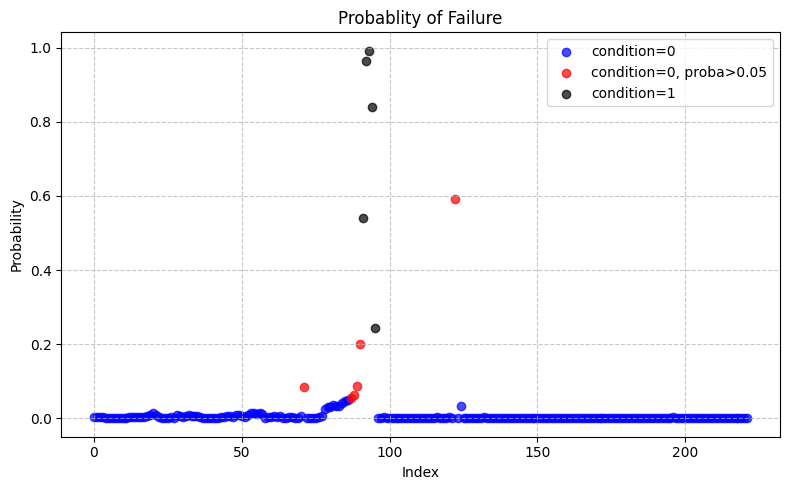

In [67]:
aggregation_size = 400

treshold_probability = 0.05

dataframe = df4

aggregated_probabilities = aggregate(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

                 Coefficient
LPS                -5.655241
Oil_temperature     3.240399
H1                 -2.195878
counter             2.143900
TP2                -1.389866
TP3                -1.018204
Pressure_switch     0.983625
DV_pressure         0.900820
Reservoirs         -0.878094
DV_eletric         -0.591540
Motor_current      -0.449135
Oil_level          -0.448313
Caudal_impulses    -0.448313
COMP               -0.427531
MPG                -0.142219
Towers             -0.019000
Intercept: -9.390251756684192


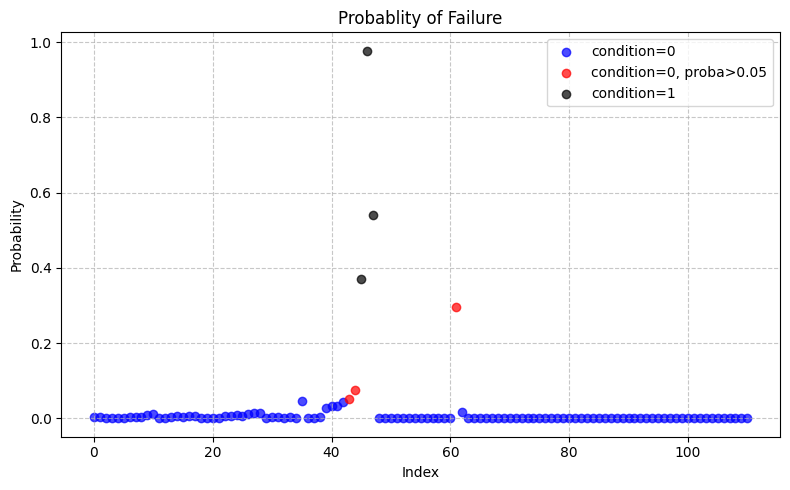

In [68]:
aggregation_size = 800

treshold_probability = 0.05

dataframe = df4

aggregated_probabilities = aggregate(dataframe, aggregation_size, 4, 2, 4, 2, 4, 2, 6, 6)

plot_probabilities_by_condition(aggregated_probabilities, treshold_probability)

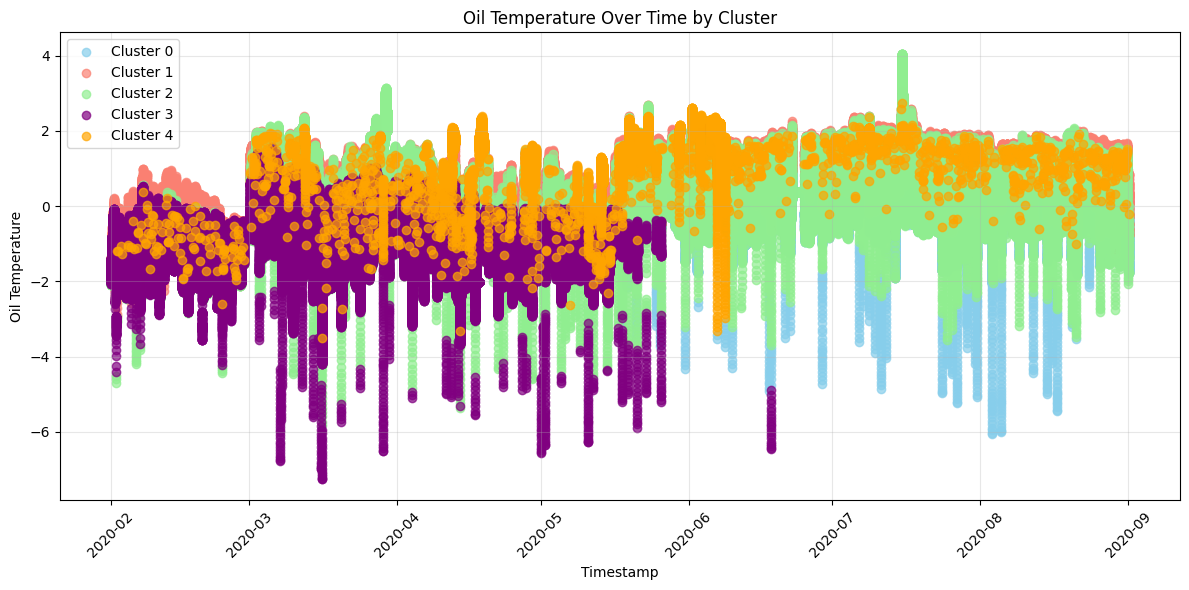

In [90]:
# Reset index if needed
df_plot = df_clustered.reset_index()

# Assuming df_clustered has:
# - A timestamp column (adjust name if different)
# - 'Oil_temperature' column
# - 'Cluster' column with cluster assignments

plt.figure(figsize=(12, 6))

# Define 5 distinct colors for the clusters
cluster_colors = ['skyblue', 'salmon', 'lightgreen', 'purple', 'orange']

# Create scatter plot with timestamps on x-axis, oil temp on y-axis
# and points colored by cluster
for i, cluster_id in enumerate(sorted(df_plot['Cluster'].unique())):
    cluster_data = df_plot[df_plot['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['timestamp'],  # x-axis: timestamps
        cluster_data['Oil_temperature'],  # y-axis: oil temperature
        label=f'Cluster {cluster_id}',
        alpha=0.7,
        # Use the color from our list based on the index
        color=cluster_colors[i % len(cluster_colors)]  # The modulo ensures we don't go out of bounds
    )

plt.xlabel('Timestamp')
plt.ylabel('Oil Temperature')
plt.title('Oil Temperature Over Time by Cluster')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)  # Rotate timestamp labels for better readability
plt.tight_layout()
plt.show()